# t-distributed stochastic neighbour embedding

$\textbf{Intuition:}$ t-distributed stochastic neighbour embedding referred to as t-SNE for short is a popular machine learning algorithm for 
nonlinear dimensionality reduction and data visualisation. t-SNE falls into the category of $\textbf{neighbourhood embedding}$ algorithms and is considered well suited for embedding high-dimensional data onto a low-dimensional space of two or three dimensions convient for visualisation and plotting.
Each high dimensional input data point is modelled by a lower dimensional projection in such as way that similar input points are mapped to similar projections with high probability; in contrast dissimilar points are mapped to distant projections with high probability. 
This is achieved in a two stage process which involves constructing a probability distribution over pairs of inputs which assigns high probability to the event of picking similar points (later we will clarify what we mean by similar). Similarly we define a second distribution which now models the low dimensional projections of the inputs and places high probability on similar projects to be drawn together. Then the training of t-SNE consists of minimizing the Kullback-Leibler divergence between the two distributions with respect to the locaitons of the points in the map.


$\textbf{Formal definition:}$
Denote your high-dimensional obaservations as: $y_1,\dots,y_N$. The conditional probability $p_{j|i}$ that $y_i$ would pick $y_j$ as its neighbour is computed under the assumption that neighbours of $y_i$ are noramlly distributed around $y_i$:
\begin{align}
p_{j|i}=\frac{\exp(-\lVert y_i-y_j \rVert ^2)/2\sigma^2}{\sum_{k\neq i}\exp(-\lVert y_i-y_k \rVert^2 /2\sigma^2)}
\end{align}
The pairwise similarity between $y_i$ and $y_j$ is defined as the symmetrized conditional probability: 
\begin{align}
p_{ij} = \frac{p_{j|i}+p_{i|j}}{2N}
\end{align}
Note that a more obvious assumption would have been to directly assume that the pairwise similarities $p_{ij}$ of the inputs are proportiantely Gaussian. However, the issue with such an approach would be that for an outlier point $y_i$, the distances $\lVert y_i-y_j \rVert ^2$ becomes very large for all $j$ and hence the values for $p_{ij}$ are extremely small for all $j$; this implies that the location of its low dimensional projection will have very little effect on the cost function. 
The assumption that $p_{ij} = \frac{p_{j|i}+p_{i|j}}{2N}$ ensures that $\sum_jp_{ij}>\frac{1}{2N}$ for all inputs $y_i$.
The bandwidth $\sigma_0$ is set such that the $\textit{perplexity}$ of the conditional equals some pre-defined value. 









It is not likely that there is a single value of $\sigma_i$ that is optimal for all data points in the data set because the density of the data is likely to vary. In dense regions a smaller value of $\sigma_i$ is usually more appropriate than in sparser regions. Any particular value of $\sigma_i$ induces a probability distribution, $P_i$, over all of the other data points. This distribution has an entropy which increases as $\sigma_i$ increases. t-SNE searches (original t-SNE uses binary search) the value for $\sigma_i$ that produces a distribution $P_i$ with $\textit{perplexity}$ specified by the user.  
The $\textit{perplexity}$, $\eta$, is defined as:
\begin{align}
Perplexity(P_i) = 2^{-\sum_j p_{j|i}\log_2 p_{j|i}}
\end{align}
where the power term is Shannon entropy of the distribution $P_i$ measured in bits. The reason that t-SNE is typically specified by the perplexity is because the perplexity is usually interpreted as a smooth measure of the effective number of neighbours. That is, instead of globally fixing the measure of accepted variability $\sigma_i$ around each high dimensional point, we fix the effective number of neighbours assumed a priori. 
The following link can provide some intuition behind perplexity: If $Y_1$ and $Y_2$ are independent and identically distributed random variables: $P(Y_1=Y_2)=\frac{1}{Perplexity(Y)}$. For example, the perplexity of a uniform distribution on the set of outcomes ${y_1,\dots,y_N}$ is $\|{y_1,\dots,y_N}\|=N$.

The aim of t-SNE is to learn a $D$-dimensional map $x_1,\dots,x_N$ (with $x_i\in R^D$ for $i=1,\dots$,N) which reflects $p_{ij}$ as well as possible. The way this is achieved is by constructing a distribution $q_{ij}$ which models the similarity of projections $x_i$ and $x_j$ as:
\begin{align}
q_{ij}=\frac{\left(1+\lVert x_i - x_j \rVert ^2\right)^{-1}}{\sum_{k \neq l}\left( 1 + \lVert x_k - x_l \rVert ^2\right)^{-1}}
\end{align}
That is, we assume that similarity between projections is modelled with a student-t distribution with 1 degree of freedom. This is because of the nice property that $\left(1+\lVert y_i - y_j \rVert ^2\right)^{-1}$ approaches an inverse square law for large pairwise distances $\lVert x_i - x_j \rVert$ in the low dimensional map. This makes the map’s representation of joint probabilities almost invariant to changes in the scale of the map for map points that are far apart. It also means that large clusters of points that are far apart interact in just the same way as individual points, so the optimization operates in the same way at all but the finest scale. 
The training of t-SNE then consists of finding the location of $x_1,\dots,x_N$ on the map by minimizing the Kullback-Leibler divergence of the distribution $Q$ from the distribution $P$: 
\begin{align}
KL\left(P\lVert Q \right) = \sum _{i \neq j} p_{ij}\log \frac{p_{ij}}{q_{ij}} 
\end{align}
We minimize the K-L divergence with respect to the points $x_i$ using $\textit{gradient descent}$. 



The gradient of $KL\left(P\lVert Q \right)$ with respect to $x_i$ is:
\begin{align}
\frac{\partial KL\left(P\lVert Q \right)}{\partial x_i} = 4\sum _j \left(p_{ij}-q_{ij}\right)\left(x_i-x_j\right)\left(1+\lVert x_i - x_j \rVert ^2\right)^{-1}
\end{align}
Once we have computed the above gradient, we iteratively update our current estimate for the projections $X(t)=x_1(t),\dots,x_N(t)$:
\begin{align}
X^{(t)} = X^{(t-1)} + \eta\frac{\partial KL\left(P\lVert Q \right)}{\partial X}(X^{(t-1)}) + \alpha(t)\left(X^{(t-1)}-X^{(t-2)}\right)
\end{align}
where $\eta$ sets the learning rate for the t-SNE algorithm and $\alpha(t)$ sets the momentum at iteration $t$ 

Here is a summary of vanilla t-SNE algortihm:
<br>

$\textbf{Input:}$ data, perplexity $\epsilon$, number of iterations $T$, learning rate $\eta$, momentum $\alpha(t)$
<br>
$\textbf{Output:}$ low dimensional projections $X^{(T)}={x_1^{(T)},\dots,x_N^{(T)}}$
<br>
Compute $p_{j|i}$ for perplexity $\epsilon$;
$p_{ij}=\frac{p_{j|i}+p_{i|j}}{2N}$
<br>
Sample initial projections from a zero mean normal distribution, $X^{(0)}~\mathcal{N}\left(0,10^{-4}\mathbf{I}\right)$
<br>
$\textbf{for}$ $t=1$ to $T$
<br>
compute $q_{ij}$
<br>
compute $\frac{\partial KL\left(P\lVert Q \right)}{\partial X}$
<br>
set $X^{(t)}=X^{(t-1)}+\eta\frac{\partial KL\left(P\lVert Q \right)}{\partial X}+\alpha(t)\left(x^{(t-1)-X^{()t-2}}\right)$

# Implementation

In [1]:
import numpy as np
import pylab
from sklearn.decomposition import PCA


def Hbeta(D=np.array([]), beta=1.0):
    """
        Compute the perplexity and the P-row for a specific value of the
        precision of a Gaussian distribution.
    """

    # Compute P-row and corresponding perplexity
    P = np.exp(-D.copy() * beta)
    sumP = sum(P)
    H = np.log(sumP) + beta * np.sum(D * P) / sumP
    P = P / sumP
    return H, P



In [2]:
def pca(X=np.array([]), no_dims=50):
    """
        Runs PCA on the NxD array X in order to reduce its dimensionality to
        no_dims dimensions.
    """

    print("Preprocessing the data using PCA...")
    (n, d) = X.shape
    X = X - np.tile(np.mean(X, 0), (n, 1))
    (l, M) = np.linalg.eig(np.dot(X.T, X))
    Y = np.dot(X, M[:, 0:no_dims])
    return Y


In [3]:
def x2p(X=np.array([]), tol=1e-5, perplexity=30.0):
    """
        Performs a binary search to get P-values in such a way that each
        conditional Gaussian has the same perplexity.
    """

    # Initialize some variables
    print("Computing pairwise distances...")
    (n, d) = X.shape
    sum_X = np.sum(np.square(X), 1)
    D = np.add(np.add(-2 * np.dot(X, X.T), sum_X).T, sum_X)
    P = np.zeros((n, n))
    beta = np.ones((n, 1))
    logU = np.log(perplexity)

    # Loop over all datapoints
    for i in range(n):

        # Print progress
        if i % 500 == 0:
            print("Computing P-values for point %d of %d..." % (i, n))

        # Compute the Gaussian kernel and entropy for the current precision
        betamin = -np.inf
        betamax = np.inf
        Di = D[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))]
        (H, thisP) = Hbeta(Di, beta[i])

        # Evaluate whether the perplexity is within tolerance
        Hdiff = H - logU
        tries = 0
        while np.abs(Hdiff) > tol and tries < 50:

            # If not, increase or decrease precision
            if Hdiff > 0:
                betamin = beta[i].copy()
                if betamax == np.inf or betamax == -np.inf:
                    beta[i] = beta[i] * 2.
                else:
                    beta[i] = (beta[i] + betamax) / 2.
            else:
                betamax = beta[i].copy()
                if betamin == np.inf or betamin == -np.inf:
                    beta[i] = beta[i] / 2.
                else:
                    beta[i] = (beta[i] + betamin) / 2.

            # Recompute the values
            (H, thisP) = Hbeta(Di, beta[i])
            Hdiff = H - logU
            tries += 1

        # Set the final row of P
        P[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))] = thisP

    # Return final P-matrix
    print("Mean value of sigma: %f" % np.mean(np.sqrt(1 / beta)))
    return P

In [6]:
def tsne(X=np.array([]), no_dims=2, initial_dims=50, perplexity=30.0):
    """
        Runs t-SNE on the dataset in the NxD array X to reduce its
        dimensionality to no_dims dimensions. The syntaxis of the function is
        `Y = tsne.tsne(X, no_dims, perplexity), where X is an NxD NumPy array.
    """

    # Check inputs
    if isinstance(no_dims, float):
        print("Error: array X should have type float.")
        return -1
    if round(no_dims) != no_dims:
        print("Error: number of dimensions should be an integer.")
        return -1

    # Initialize variables
    X = pca(X, initial_dims).real
    (n, d) = X.shape
    max_iter = 100
    initial_momentum = 0.5
    final_momentum = 0.8
    eta = 500
    min_gain = 0.01
    Y = np.random.randn(n, no_dims)
    dY = np.zeros((n, no_dims))
    iY = np.zeros((n, no_dims))
    gains = np.ones((n, no_dims))

    # Compute P-values
    P = x2p(X, 1e-5, perplexity)
    P = P + np.transpose(P)
    P = P / np.sum(P)
    P = P * 4.									# early exaggeration
    P = np.maximum(P, 1e-12)

    # Run iterations
    for iter in range(max_iter):

        # Compute pairwise affinities
        sum_Y = np.sum(np.square(Y), 1)
        num = -2. * np.dot(Y, Y.T)
        num = 1. / (1. + np.add(np.add(num, sum_Y).T, sum_Y))
        num[range(n), range(n)] = 0.
        Q = num / np.sum(num)
        Q = np.maximum(Q, 1e-12)

        # Compute gradient
        PQ = P - Q
        for i in range(n):
            dY[i, :] = np.sum(np.tile(PQ[:, i] * num[:, i], (no_dims, 1)).T * (Y[i, :] - Y), 0)

        # Perform the update
        if iter < 20:
            momentum = initial_momentum
        else:
            momentum = final_momentum
        gains = (gains + 0.2) * ((dY > 0.) != (iY > 0.)) + \
                (gains * 0.8) * ((dY > 0.) == (iY > 0.))
        gains[gains < min_gain] = min_gain
        iY = momentum * iY - eta * (gains * dY)
        Y = Y + iY
        Y = Y - np.tile(np.mean(Y, 0), (n, 1))

        # Compute current value of cost function
        if (iter + 1) % 10 == 0:
            C = np.sum(P * np.log(P / Q))
            print("Iteration %d: error is %f" % (iter + 1, C))

        # Stop lying about P-values
        if iter == 100:
            P = P / 4.

    # Return solution
    return Y

Run Y = tsne.tsne(X, no_dims, perplexity) to perform t-SNE on your dataset.
Running example on 2,500 MNIST digits...
Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 2500...
Computing P-values for point 500 of 2500...
Computing P-values for point 1000 of 2500...
Computing P-values for point 1500 of 2500...
Computing P-values for point 2000 of 2500...
Mean value of sigma: 2.386597
Iteration 10: error is 23.579839
Iteration 20: error is 21.022299
Iteration 30: error is 17.815820
Iteration 40: error is 16.733567
Iteration 50: error is 16.417398
Iteration 60: error is 16.273365
Iteration 70: error is 16.131324
Iteration 80: error is 16.021722
Iteration 90: error is 15.957891
Iteration 100: error is 15.904718


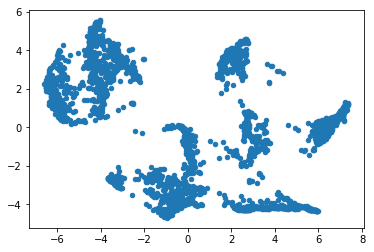

In [7]:

if __name__ == "__main__":
    print("Run Y = tsne.tsne(X, no_dims, perplexity) to perform t-SNE on your dataset.")
    print("Running example on 2,500 MNIST digits...")
    X = np.loadtxt("mnist2500_X.txt")
    labels = np.loadtxt("mnist2500_labels.txt")
    Y = tsne(X, 2, 50, 20.0)
    pylab.scatter(Y[:, 0], Y[:, 1], 20)
    pylab.show()

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 [Text(2.17102,3.64043,'0'),
  Text(4.12848,-4.20255,'1'),
  Text(2.77585,-0.3567,'2'),
  Text(-0.536636,-3.81061,'3'),
  Text(-3.4495,3.54942,'4'),
  Text(-1.62489,-2.74636,'5'),
  Text(6.45744,0.224152,'6'),
  Text(-5.91955,1.59692,'7'),
  Text(-0.0582387,-0.585539,'8'),
  Text(-4.16022,2.7333,'9')])

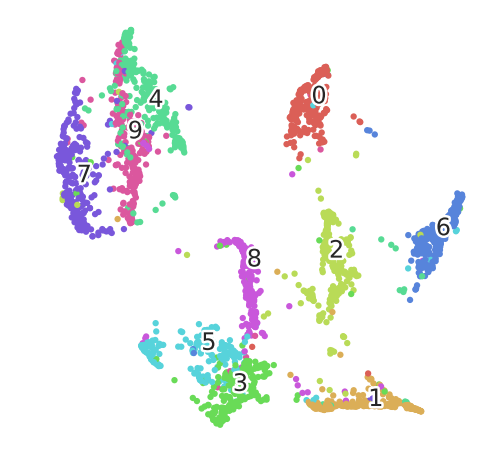

In [9]:
scatter(Y, labels)

# t-SNE in scikit-learn toolbox

In [10]:
import sklearn
from sklearn.manifold import TSNE
YY = TSNE(n_components=2).fit_transform(X)

(<Figure size 576x576 with 1 Axes>,
 [Text(3.57876,59.596,'0'),
  Text(-36.5739,-11.6156,'1'),
  Text(-10.3306,17.4506,'2'),
  Text(26.1762,22.1064,'3'),
  Text(29.084,-41.2759,'4'),
  Text(31.5041,5.89034,'5'),
  Text(-40.588,40.4743,'6'),
  Text(-4.18384,-55.3405,'7'),
  Text(3.65227,-2.97022,'8'),
  Text(13.2435,-34.5792,'9')])

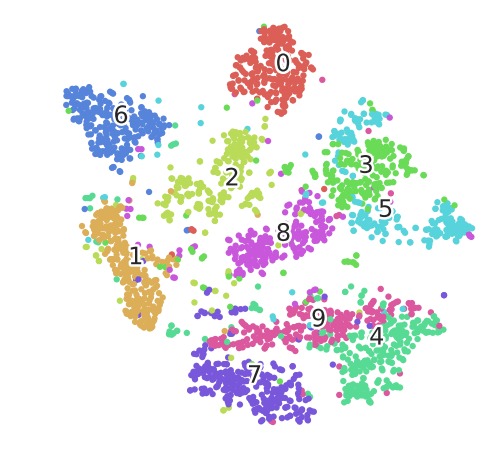

In [11]:
scatter(YY, labels)

Now let us have a look in how exactly successive iterations of tSNE update the estimated projections $x_1,\dots,x_N$ to get to the final answer:
 ![title](animation-tSNE.gif)
<br>

$\textbf{Drawbacks:}$ t-SNE has been successfully applied to a large domain of practical data related problems, most likely because of how simple it is to use and its ability to infer latent groupings in the data. However, before adopting t-SNE for your problem, it is worth appreciating some of its problems.   
 - similar to MDS and the other neighbourhood embedding algorithms, t-SNE is not well equiped to deal with missing data, or estimate uncertainty behind the estimated projections. 
 - to a large extend, if run for long enoguh, t-SNE is designed to recover some islands (clusters) of the projected data points in the lower dimensional space. This means that even if our input data in higher dimensional space is not intrinsically clustered, t-SNE visualization is likely to suggest a clustered structure.

 
 
 $\textbf{Question:}$ Sample 10-dimensional data from a single Gaussian distribution and use it as an input to t-SNE for different number of iterations. Did you eventually reach a scenario where t-SNE starts clustering even this data to distinct islands?
 

# Related techniques

In terms of practical applications, one can argue that t-SNE algorthm has well outgrown its predecessor: $\textit{stochastic neighborhood embedding}$ algortihm. SNE is a very similar nonlinear data visualisation technique which also falls into the category of neighbourhood embedding methods. The SNE falls very similar logic as t-SNE with the major difference coming from the way we model distributions $p_{ij}$ describing similarity in the data space and $q_{ij}$  which describes the similarity of projections  $x_i$ amd $x_j$ in the low dimensional space. Recall that in t-SNE we assumed that pairwise similarity between $y_i$ and $y_j$ is defined as the symmetrized conditional probability: 
\begin{align}
p_{ij} = \frac{p_{j|i}+p_{i|j}}{2N}
\end{align}
In SNE we only consider the conditional probability $p_{j|i}$ and we minimize the descrepancy between the conditionals $p_{j|i}$ and $p_{j|i}$ rather than the joint probabilities. The conditional probability $q_{j|i}$ in SNE is computed as:
\begin{align}
q_{j|i}=\frac{\left(-\lVert x_i - x_j \rVert ^2\right)}{\sum_{k \neq l}\left( -\lVert x_k - x_l \rVert ^2\right)}
\end{align}
Note that this implies that SNE using Gaussian rather then t-distribution to measure closeness of points in the low dimensional space. For equivalent points we set $p_{i|i}=0$ and $q_{i|i}=0$. The faightfulness with which $q_{j|i}$ models $p_{j|i}$ is measured again with the K-L divergence:  
\begin{align}
KL\left(P\lVert Q \right) = \sum _{i \neq j} p_{j|i}\log \frac{p_{j|i}}{q_{j|i}} 
\end{align}
where again the divergence is minimized using gradient discent that uses the surprisingly convinient gradient:
\begin{align}
\frac{\partial KL\left(P\lVert Q \right)}{\partial x_i} = 2\sum _j \left(p_{j|i}-q_{j|i}+p_{i|j}-q_{i|j}\right)\left(x_i-x_j\right)
\end{align}
A popular anecdote proposed in the paper introducing SNE method is that physically, we can interpret the gradient as the resultant force created by a set of springs between the map point $x_i$ and all other map points $x_j$. All springs exert a force along the direction $(x_i-x_j)$.
The spring between $x_i$ and $x_j$ repels or attracts the map points depending on whether the distance between the two in the map is too small or too large to represent the similarities between the two high-dimensional datapoints. The force exerted by the spring between $x_i$ and $x_j$ is proportional to its length, and also proportional to its stiffness, which is the mismatch $(p_{j|i}−q_{j|i} + p_{i| j} − q_{i| j})$ between the pairwise similarities of the data points and the map points. Using the different gradient then SNE successive updates follow the same form as t-SNE gradient updates.

$\textbf{Crowding problem:}$ 

An important problem which is common for many of the dimensionality reduction technqiues (such as PCA, MDS, SNE and some techniques we will study later in the course) is the so called $\textit{crowding problem}$. Since often the sought lower dimensional space in visual analytics is a lot smaller than the effective dimensionality of the input data, the neighborhoods around different data points are mistmatched. If we are doing dimensionality reduction we have already seen some tools that indicate if the latent space we have learn is too much smaller than the input data space to preserve the important structure; however note that in visual analytics we can usually plot only 2-D or 3-D projections.

In high-dimensional space, points have can many close-by neighbors in different directions. In a 2-D space, you typically have to arrange close-by neighbors in a circle around the central point, which constrains relationships among neighbors. In a high-dimensional space, you have have many points that are equidistant from one another; in a 2-D space for example at most 3 points are equidistant from each other (you can show that using triangle inequality).

Consider how does the volume of a sphere scales in higher than 3 dimensions $D$(it scales proportional to $r^D$ with $r$ denoting the radius of the hypersphere). In 2-D there is a lot less area available at the same radius $r$ hence we have to some times place items at a different relative distance from a reference point. Due to lack of room nearby we can end up placing high dimensional items into 2-D space far off than where they should (intuitively) be. In contrast, some items end up crowded in the center to stay close to all of the far-off points. This practical issus is known as the crowding problem and can lead to us misinterpreting the outcomes of our dimensionality reduction (especially in the case of 2-D visuallizations).  
